<a href="https://colab.research.google.com/github/siva4iov/FlatsPrice_DS_Proj/blob/master/Feature_engineering_and_model_building.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model building

## Import dependencies

In [592]:
import pandas as pd
import numpy as np
from google.colab import files
import os
import sklearn
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [593]:
if not os.path.exists("/content/dataset_clean_full.csv"):
  files.upload()

In [594]:
df = pd.read_csv("dataset_clean_full.csv", sep=";")
df.head()

,Living_space,Num_of_rooms,Renovation,Price,Total_area,Kitchen_area,Floor,Appliances_1,Appliances_2,Appliances_3,...,longitude,district_1,district_2,district_3,district_4,district_5,district_6,district_7,district_8,district_9
0,20.0,1,1,27000,39.0,12.0,10,0,1,0,...,49.179327,1,0,0,0,0,0,0,0,0
1,NaN,1,1,14000,18.0,NaN,9,0,0,0,...,49.107790,0,1,0,0,0,0,0,0,0
2,NaN,3,2,40000,105.0,25.0,2,0,1,1,...,49.169175,0,0,1,0,0,0,0,0,0
3,13.5,1,2,20000,45.0,17.5,5,0,1,1,...,49.136806,0,0,0,1,0,0,0,0,0
4,24.0,1,2,22000,36.0,6.0,10,0,1,1,...,49.146880,0,0,0,1,0,0,0,0,0


## Droping uselles data
There are some columns which have little amount of entries and are not meaningful

I'm talking about `Appliances_1` and `Appliances_6`, which mean "*iron*" and "*hair dryer*".

Also in districts 8 and 9 only 2 entries, so I decide to drop rows with this districts and to drop these columns

In [595]:
df.sum()

Living_space                                               23310.3
Num_of_rooms                                                  2140
Renovation                                                    2374
Price                                                     39880016
Total_area                                                 69563.7
Kitchen_area                                               14588.3
Floor                                                         8601
Appliances_1                                                     9
Appliances_2                                                   772
Appliances_3                                                   298
Appliances_4                                                   395
Appliances_5                                                   187
Appliances_6                                                     4
Appliances_7                                                   774
Appliances_8                                                  

Dropping districts 8 and 9

In [596]:
df = df[(df["district_8"] != 1) & (df["district_9"] != 1)]\
.drop(columns=["district_8", "district_9"])

In [597]:
df = df.drop(columns=["Appliances_1", "Appliances_6"])

## Nan values

In [598]:
df.isna().sum()

Living_space     590
Num_of_rooms       0
Renovation         0
Price              0
Total_area         0
Kitchen_area      81
Floor              0
Appliances_2       0
Appliances_3       0
Appliances_4       0
Appliances_5       0
Appliances_7       0
Appliances_8       0
Appliances_9       0
Appliances_10      0
Balcony_1          0
Balcony_2          0
Furniture_1        0
Furniture_2        0
Furniture_3        0
Internet_tv_1      0
Internet_tv_2      0
Bathroom_1         0
Bathroom_2         0
Utilities_1        0
Room_type_1        0
Room_type_2        0
Studio             0
Floors_in_b        0
location           0
coord              0
latitude           0
longitude          0
district_1         0
district_2         0
district_3         0
district_4         0
district_5         0
district_6         0
district_7         0
dtype: int64

There are only two columns: `Living_area` and `Kitchen_area`. But we have all `Total_area`.

So I'll impute values depending on its `Total_area` and `Price`

In [599]:
from sklearn.impute import KNNImputer
cols = ["Living_space", 'Kitchen_area', "Total_area", "Price"]
imputer = KNNImputer(n_neighbors=3, weights='distance', copy=True)
x = imputer.fit_transform(df[cols])
df.loc[:, cols] = x

In [600]:
df.isna().sum()

Living_space     0
Num_of_rooms     0
Renovation       0
Price            0
Total_area       0
Kitchen_area     0
Floor            0
Appliances_2     0
Appliances_3     0
Appliances_4     0
Appliances_5     0
Appliances_7     0
Appliances_8     0
Appliances_9     0
Appliances_10    0
Balcony_1        0
Balcony_2        0
Furniture_1      0
Furniture_2      0
Furniture_3      0
Internet_tv_1    0
Internet_tv_2    0
Bathroom_1       0
Bathroom_2       0
Utilities_1      0
Room_type_1      0
Room_type_2      0
Studio           0
Floors_in_b      0
location         0
coord            0
latitude         0
longitude        0
district_1       0
district_2       0
district_3       0
district_4       0
district_5       0
district_6       0
district_7       0
dtype: int64

In [601]:
df.columns

Index(['Living_space', 'Num_of_rooms', 'Renovation', 'Price', 'Total_area',
       'Kitchen_area', 'Floor', 'Appliances_2', 'Appliances_3', 'Appliances_4',
       'Appliances_5', 'Appliances_7', 'Appliances_8', 'Appliances_9',
       'Appliances_10', 'Balcony_1', 'Balcony_2', 'Furniture_1', 'Furniture_2',
       'Furniture_3', 'Internet_tv_1', 'Internet_tv_2', 'Bathroom_1',
       'Bathroom_2', 'Utilities_1', 'Room_type_1', 'Room_type_2', 'Studio',
       'Floors_in_b', 'location', 'coord', 'latitude', 'longitude',
       'district_1', 'district_2', 'district_3', 'district_4', 'district_5',
       'district_6', 'district_7'],
      dtype='object')

## Lets add some more features

As I planned, I will add feature *is it 1st floor or not*

In [602]:
df.loc[:, "1st_floor"] = (df['Floor'] == 1).astype(np.int8)
df["1st_floor"].sum()

84

Only 84 entries, i will decide later, use this feature or not

Also, I should add calculated distances to metro/city_center

In [603]:
from geopy.distance import geodesic as GD

metro = [
    [55.74437098345888, 49.21842147085857],
    [55.75005848187576, 49.20874803385248],
    [55.759933872926894, 49.19165479076522],
    [55.765435, 49.165143],
    [55.77690597053148, 49.142589131055516],
    [55.787108350131085, 49.122054609493496],
    [55.7959302953497, 49.1062780870964],
    [55.81666978747769, 49.09852469080619],
    [55.82716721066275, 49.08321529204553]
]
metro = np.array(metro)

city_center = [[55.787602, 49.121079]]
city_center = np.array(city_center)


def calc_distances(df: pd.DataFrame) -> pd.DataFrame:
  distances = []
  values = df.loc[:, ["latitude", "longitude"]].values
  min_d = None
  for coords in values:
    for st in metro:
      d = GD(coords, st).km
      if (min_d is None) or d < min_d:
        min_d = d
    cc_d = GD(coords, city_center[0]).km
    distances.append([min_d, cc_d])
    min_d = None
  distances = np.array(distances)
  return pd.DataFrame(distances, columns=["Metro_d", "Center_d"])
distances = calc_distances(df)
distances

,Metro_d,Center_d
0,3.278917,3.827817
1,1.540129,1.551438
2,3.213987,6.911961
3,2.400260,3.336201
4,3.178507,4.494772
...,...,...
1316,0.423964,0.889100
1317,10.402943,10.824456
1318,0.861105,7.324594
1319,2.177858,3.704208


In [604]:
df = pd.concat([df.reset_index(drop=True), distances], axis=1)

In [605]:
df.isna().sum()

Living_space     0
Num_of_rooms     0
Renovation       0
Price            0
Total_area       0
Kitchen_area     0
Floor            0
Appliances_2     0
Appliances_3     0
Appliances_4     0
Appliances_5     0
Appliances_7     0
Appliances_8     0
Appliances_9     0
Appliances_10    0
Balcony_1        0
Balcony_2        0
Furniture_1      0
Furniture_2      0
Furniture_3      0
Internet_tv_1    0
Internet_tv_2    0
Bathroom_1       0
Bathroom_2       0
Utilities_1      0
Room_type_1      0
Room_type_2      0
Studio           0
Floors_in_b      0
location         0
coord            0
latitude         0
longitude        0
district_1       0
district_2       0
district_3       0
district_4       0
district_5       0
district_6       0
district_7       0
1st_floor        0
Metro_d          0
Center_d         0
dtype: int64

## Droping location data with coordinates

In [606]:
df = df.drop(columns=['location', 'coord', 'latitude', 'longitude'])

## Separating target variable

In [626]:
y = df.loc[:, "Price"]
X = df.drop(columns=["Price"])
X.head()

,Living_space,Num_of_rooms,Renovation,Total_area,Kitchen_area,Floor,Appliances_2,Appliances_3,Appliances_4,Appliances_5,...,district_1,district_2,district_3,district_4,district_5,district_6,district_7,1st_floor,Metro_d,Center_d
0,20.000000,1,1,39.0,12.0,10,1,0,0,0,...,1,0,0,0,0,0,0,0,3.278917,3.827817
1,16.411765,1,1,18.0,7.0,9,0,0,0,0,...,0,1,0,0,0,0,0,0,1.540129,1.551438
2,75.453998,3,2,105.0,25.0,2,1,1,1,0,...,0,0,1,0,0,0,0,0,3.213987,6.911961
3,13.500000,1,2,45.0,17.5,5,1,1,1,0,...,0,0,0,1,0,0,0,0,2.400260,3.336201
4,24.000000,1,2,36.0,6.0,10,1,1,1,0,...,0,0,0,1,0,0,0,0,3.178507,4.494772


## Pipiline for normalizing data

I already OH-encoded the categorical features,
so I will use transformer for numerical features 


In [608]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer, make_column_selector

cols = ["Living_space", "Total_area", "Kitchen_area", "Floor", "Floors_in_b",
        "Metro_d", "Center_d"]

num_transformer = Pipeline(steps=[
    ("log_transformer", FunctionTransformer(np.log)), #log transformation make distribution look more gaussian
    ("scaler", StandardScaler())
], memory="scaler_memory")

ct = ColumnTransformer([
    ("num_transformer", num_transformer, cols)
])



Transforming

In [627]:
X = ct.fit_transform(X)

## Let's try some baseline approaches

Here basically linear models and I noticed that they are working better with polynomial transformation, so I will check score on both data:
regular, and polynomial transformated

## Cross-validation

Dataset is quite small, so a good solution would be to use cross validation

In [643]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn import tree

from sklearn.model_selection import cross_val_score



pf = PolynomialFeatures()
X_poly = pf.fit_transform(X)

models = [
    linear_model.LinearRegression(), linear_model.Lasso(500),
    ElasticNet(0.1), linear_model.BayesianRidge(),
    KNeighborsRegressor(10, weights='distance'),
    tree.DecisionTreeRegressor(max_depth=4)
          ]

model_names = [
    "LinearReg", "Lasso", "ElasticNet", "BayesianRidge",
    "KNN", "DecisionTree"
]
scores = []
scores_poly = []

for model in models:
  scores.append(cross_val_score(model, X, y, cv=5).mean())
  scores_poly.append(cross_val_score(model, X_poly, y, cv=5).mean())

score = pd.DataFrame(np.array([model_names, scores, scores_poly]).T,
                     columns=["Model", "Score", "Scores(Poly features)"])

score

,Model,Score,Scores(Poly features)
0,LinearReg,0.3845046748187818,0.4973469855823929
1,Lasso,0.39094301422959227,0.5092355689513344
2,ElasticNet,0.39062251012604526,0.5013850452499569
3,BayesianRidge,0.38646194520887994,0.5000986535430425
4,KNN,0.5503278661000217,0.5240647160917804
5,DecisionTree,0.3023923976588147,0.3018395127461814


Models that show the best results:


1.   KNN with regular data
2.   KNN with poly data
3.   Lasso with poly data
4.   ElasticNet with poly data

These models describe the data quite well, I'm pleasantly surprised.

## Teamwork
Maybe I should try unite these models

In [648]:
from sklearn.ensemble import VotingRegressor

Lasso = Pipeline([
    ["poly", PolynomialFeatures()],
    ['model', linear_model.Lasso(500)]
])

PolyKNN = Pipeline([
    ["poly", PolynomialFeatures()],
    ['model', KNeighborsRegressor(10, weights='distance')]
])

ElasticPoly = Pipeline([
    ["poly", PolynomialFeatures()],
    ['model', ElasticNet(0.1)]
])


model = VotingRegressor([
    ["lasso", Lasso],
    ["polyknn", PolyKNN],
    # ["elasticpoly", ElasticPoly],
    ["knn", KNeighborsRegressor(10, weights='distance')]
]
)

scores = cross_val_score(model, X, y, cv=5)
scores.mean()


0.559198456902068

Pretty great result 

(I removed elasticnet,  model's working better without elasticnet)

## Let's try something more serious

In [634]:
import xgboost as xgb

model = xgb.XGBRegressor(3, 0.05, n_estimators=150, objective='reg:squarederror')

scores = cross_val_score(model, tr, y, cv=3, scoring='r2')
scores.mean()

0.47202181033977325

(array([[795., 376.,  91.,  21.,  18.,   8.,   7.,   2.,   2.,   1.],
        [789., 388.,  89.,  35.,   9.,   6.,   3.,   2.,   0.,   0.]]),
 array([  8000.,  27200.,  46400.,  65600.,  84800., 104000., 123200.,
        142400., 161600., 180800., 200000.]),
 <a list of 2 Lists of Patches objects>)

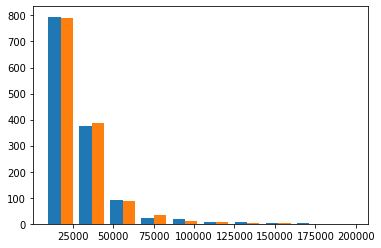

In [560]:
model.fit(tr, y)
preds = model.predict(tr)
plt.hist([y, preds])

In [495]:
!pip install catboost
import catboost as cb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.8 MB 1.3 MB/s 


In [497]:
X.columns

Index(['Living_space', 'Num_of_rooms', 'Renovation', 'Total_area',
       'Kitchen_area', 'Floor', 'Appliances_2', 'Appliances_3', 'Appliances_4',
       'Appliances_5', 'Appliances_7', 'Appliances_8', 'Appliances_9',
       'Appliances_10', 'Balcony_1', 'Balcony_2', 'Furniture_1', 'Furniture_2',
       'Furniture_3', 'Internet_tv_1', 'Internet_tv_2', 'Bathroom_1',
       'Bathroom_2', 'Utilities_1', 'Room_type_1', 'Room_type_2', 'Studio',
       'Floors_in_b', 'district_1', 'district_2', 'district_3', 'district_4',
       'district_5', 'district_6', 'district_7', '1st_floor', 'Metro_d',
       'Center_d'],
      dtype='object')

In [586]:
model = cb.CatBoostRegressor(iterations=150, learning_rate=0.05, max_depth=5,
                             verbose=0)

scores = cross_val_score(model, tr, y, cv=3, scoring='r2')
scores.mean()

0.5213424747096805

(array([[795., 376.,  91.,  21.,  18.,   8.,   7.,   2.,   2.,   1.],
        [767., 411.,  94.,  31.,   9.,   5.,   2.,   2.,   0.,   0.]]),
 array([  8000.,  27200.,  46400.,  65600.,  84800., 104000., 123200.,
        142400., 161600., 180800., 200000.]),
 <a list of 2 Lists of Patches objects>)

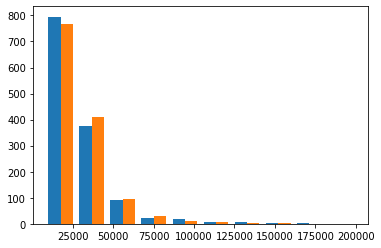

In [587]:
model.fit(tr, y)
preds = model.predict(tr)
plt.hist([y, preds])

In [632]:
Lasso = Pipeline([
    ["poly", PolynomialFeatures()],
    ['model', linear_model.Lasso(500)]
])
PolyKNN = Pipeline([
    ["poly", PolynomialFeatures()],
    ['model', KNeighborsRegressor(10, weights='distance')]
])
model = VotingRegressor([
    ['cb', cb.CatBoostRegressor(iterations=150, learning_rate=0.05, max_depth=5,
                             verbose=0)],
    ['xgb', xgb.XGBRegressor(3, 0.05, n_estimators=150, objective='reg:squarederror')],
    ["knn", KNeighborsRegressor(10, weights='distance')],
    ["lasso", Lasso],
    ['polyknn', PolyKNN]
    ], 
)

scores = cross_val_score(model, X, y, cv=5)
scores.mean()

0.5628064105867394

(array([[795., 376.,  91.,  21.,  18.,   8.,   7.,   2.,   2.,   1.],
        [769., 409.,  84.,  37.,   8.,   9.,   3.,   0.,   2.,   0.]]),
 array([  8000.,  27200.,  46400.,  65600.,  84800., 104000., 123200.,
        142400., 161600., 180800., 200000.]),
 <a list of 2 Lists of Patches objects>)

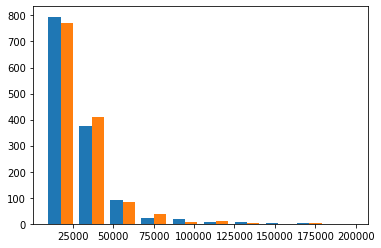

In [581]:
model.fit(tr, y)
preds = model.predict(tr)
plt.hist([y, preds])

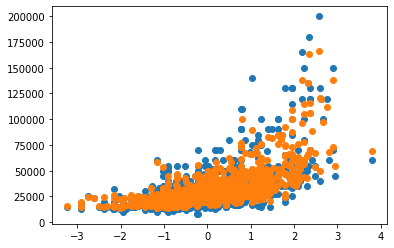

In [584]:
plt.scatter(tr[:, 0], y)
plt.scatter(tr[:, 0], preds)